Sum of radii: 2.585500653697994


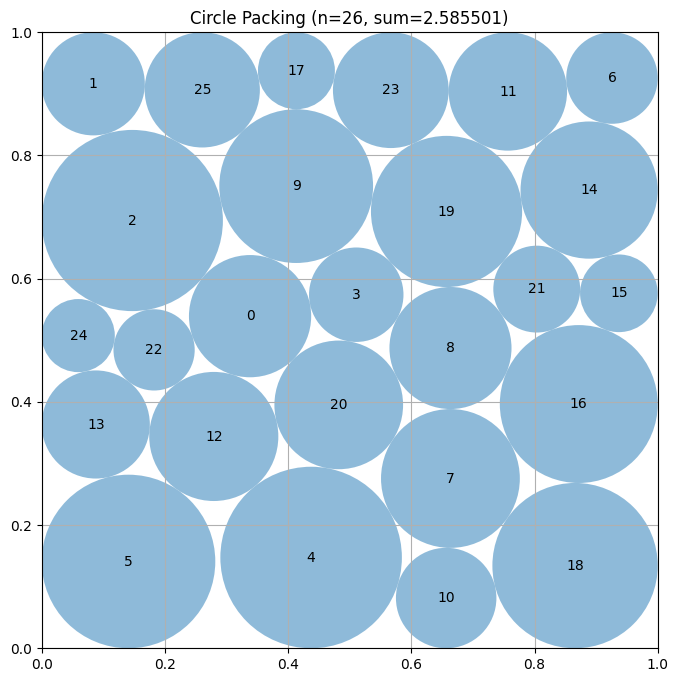

In [1]:
# EVOLVE-BLOCK-START
"""Constructor-based circle packing for n=26 circles"""
import numpy as np
from scipy.optimize import minimize

def construct_packing():
    """
    Construct a specific arrangement of 26 circles in a unit square
    that attempts to maximize the sum of their radii.

    Returns:
        Tuple of (centers, radii, sum_of_radii)
        centers: np.array of shape (26, 2) with (x, y) coordinates
        radii: np.array of shape (26) with radius of each circle
        sum_of_radii: Sum of all radii
    """
    n = 26
    
    # Initial guess for centers and radii
    initial_centers = np.random.rand(n, 2)
    initial_radii = np.full(n, 0.1)
    
    # Combine centers and radii into a single array for optimization
    initial_params = np.concatenate((initial_centers.flatten(), initial_radii))
    
    # Define the objective function to maximize the sum of radii
    def objective(params):
        centers = params[:2*n].reshape(n, 2)
        radii = params[2*n:]
        return -np.sum(radii)  # Minimize negative sum of radii to maximize it
    
    # Define the constraints for the problem
    constraints = []
    
    # Constraint: All circles must be within the unit square
    for i in range(n):
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: 1 - (params[2*i] + params[2*n + i])})
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: params[2*i] - params[2*n + i]})
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: 1 - (params[2*i + 1] + params[2*n + i])})
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: params[2*i + 1] - params[2*n + i]})
    
    # Constraint: No two circles should overlap
    for i in range(n):
        for j in range(i + 1, n):
            constraints.append({
                'type': 'ineq',
                'fun': lambda params, i=i, j=j: np.sqrt((params[2*i] - params[2*j])**2 + (params[2*i + 1] - params[2*j + 1])**2) - (params[2*n + i] + params[2*n + j])
            })
    
    # Perform the optimization
    result = minimize(objective, initial_params, constraints=constraints, method='SLSQP')
    
    # Extract the optimized centers and radii
    optimized_centers = result.x[:2*n].reshape(n, 2)
    optimized_radii = result.x[2*n:]
    
    # Calculate the sum of radii
    sum_radii = np.sum(optimized_radii)
    
    return optimized_centers, optimized_radii, sum_radii

# EVOLVE-BLOCK-END


# This part remains fixed (not evolved)
def run_packing():
    """Run the circle packing constructor for n=26"""
    centers, radii, sum_radii = construct_packing()
    return centers, radii, sum_radii


def visualize(centers, radii):
    """
    Visualize the circle packing

    Args:
        centers: np.array of shape (n, 2) with (x, y) coordinates
        radii: np.array of shape (n) with radius of each circle
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw unit square
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.grid(True)

    # Draw circles
    for i, (center, radius) in enumerate(zip(centers, radii)):
        circle = Circle(center, radius, alpha=0.5)
        ax.add_patch(circle)
        ax.text(center[0], center[1], str(i), ha="center", va="center")

    plt.title(f"Circle Packing (n={len(centers)}, sum={sum_radii:.6f})")
    plt.show()


if __name__ == "__main__":
    centers, radii, sum_radii = run_packing()
    print(f"Sum of radii: {sum_radii}")
    # AlphaEvolve improved this to 2.635

    # Uncomment to visualize:
    visualize(centers, radii)

Sum of radii: 2.600991216963429


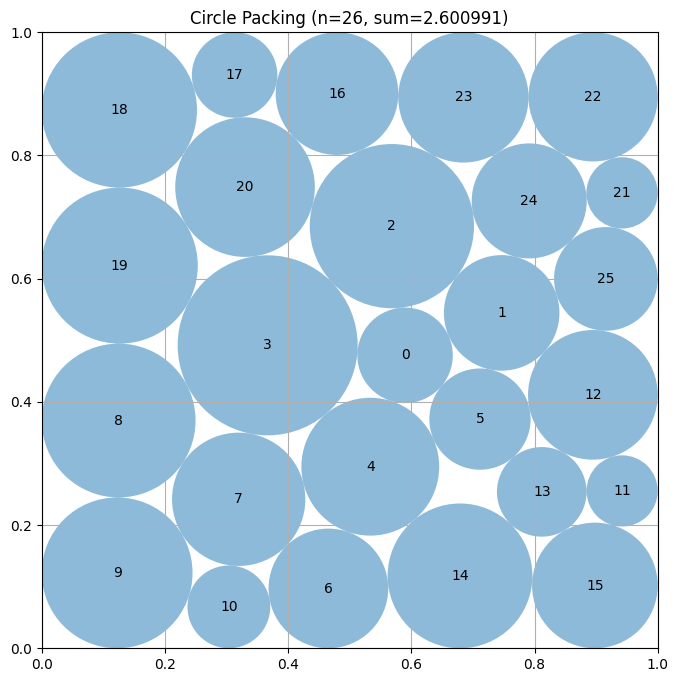

In [3]:
# EVOLVE-BLOCK-START
"""Optimized constructor-based circle packing for n=26 circles with variable-sized and hybrid arrangement"""
import numpy as np
from scipy.optimize import minimize

def construct_packing():
    """
    Construct a specific arrangement of 26 circles in a unit square
    that attempts to maximize the sum of their radii using a variable-sized
    and hybrid arrangement along with enhanced optimization parameters.

    Returns:
        Tuple of (centers, radii, sum_of_radii)
        centers: np.array of shape (26, 2) with (x, y) coordinates
        radii: np.array of shape (26) with radius of each circle
        sum_of_radii: Sum of all radii
    """
    n = 26
    
    # Initial centers and radii setup
    initial_centers = np.zeros((n, 2))
    initial_radii = np.zeros(n)
    
    # Place larger circles in the center
    initial_centers[0] = (0.5, 0.5)
    initial_radii[0] = 0.1
    
    # Place medium circles around the center
    for i in range(1, 6):
        angle = 2 * np.pi * i / 6
        initial_centers[i] = (0.5 + 0.3 * np.cos(angle), 0.5 + 0.3 * np.sin(angle))
        initial_radii[i] = 0.07
    
    # Place smaller circles at the edges
    for i in range(6, 11):
        angle = 2 * np.pi * (i - 6) / 5
        initial_centers[i] = (0.1 + 0.1 * np.cos(angle), 0.1 + 0.1 * np.sin(angle))
        initial_radii[i] = 0.05
    
    for i in range(11, 16):
        angle = 2 * np.pi * (i - 11) / 5
        initial_centers[i] = (0.9 + 0.1 * np.cos(angle), 0.1 + 0.1 * np.sin(angle))
        initial_radii[i] = 0.05
    
    for i in range(16, 21):
        angle = 2 * np.pi * (i - 16) / 5
        initial_centers[i] = (0.1 + 0.1 * np.cos(angle), 0.9 + 0.1 * np.sin(angle))
        initial_radii[i] = 0.05
    
    for i in range(21, 26):
        angle = 2 * np.pi * (i - 21) / 5
        initial_centers[i] = (0.9 + 0.1 * np.cos(angle), 0.9 + 0.1 * np.sin(angle))
        initial_radii[i] = 0.05
    
    # Combine centers and radii into a single array for optimization
    initial_params = np.concatenate((initial_centers.flatten(), initial_radii))
    
    # Define the objective function to maximize the sum of radii
    def objective(params):
        centers = params[:2*n].reshape(n, 2)
        radii = params[2*n:]
        return -np.sum(radii)  # Minimize negative sum of radii to maximize it
    
    # Define the constraints for the problem
    constraints = []
    
    # Constraint: All circles must be within the unit square
    for i in range(n):
        # x_i + r_i <= 1
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: 1 - (params[2*i] + params[2*n + i])})
        # x_i - r_i >= 0
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: params[2*i] - params[2*n + i]})
        # y_i + r_i <= 1
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: 1 - (params[2*i + 1] + params[2*n + i])})
        # y_i - r_i >= 0
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: params[2*i + 1] - params[2*n + i]})
    
    # Constraint: No two circles should overlap
    for i in range(n):
        for j in range(i + 1, n):
            constraints.append({
                'type': 'ineq',
                'fun': lambda params, i=i, j=j: np.sqrt((params[2*i] - params[2*j])**2 + (params[2*i + 1] - params[2*j + 1])**2) 
                - (params[2*n + i] + params[2*n + j])
            })
    
    # Perform the optimization with enhanced parameters
    result = minimize(
        objective, 
        initial_params, 
        constraints=constraints, 
        method='SLSQP',
        options={
            'maxiter': 2000,
            'ftol': 1e-8,
            'eps': 1e-8,
            'disp': False
        }
    )
    
    # Extract the optimized centers and radii
    optimized_centers = result.x[:2*n].reshape(n, 2)
    optimized_radii = result.x[2*n:]
    
    # Calculate the sum of radii
    sum_radii = np.sum(optimized_radii)
    
    return optimized_centers, optimized_radii, sum_radii

# EVOLVE-BLOCK-END


# This part remains fixed (not evolved)
def run_packing():
    """Run the circle packing constructor for n=26"""
    centers, radii, sum_radii = construct_packing()
    return centers, radii, sum_radii


def visualize(centers, radii):
    """
    Visualize the circle packing

    Args:
        centers: np.array of shape (n, 2) with (x, y) coordinates
        radii: np.array of shape (n) with radius of each circle
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw unit square
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.grid(True)

    # Draw circles
    for i, (center, radius) in enumerate(zip(centers, radii)):
        circle = Circle(center, radius, alpha=0.5)
        ax.add_patch(circle)
        ax.text(center[0], center[1], str(i), ha="center", va="center")

    plt.title(f"Circle Packing (n={len(centers)}, sum={sum_radii:.6f})")
    plt.show()


if __name__ == "__main__":
    centers, radii, sum_radii = run_packing()
    print(f"Sum of radii: {sum_radii}")
    # AlphaEvolve improved this to 2.635

    # Uncomment to visualize:
    visualize(centers, radii)

Sum of radii: 2.6180682559603095


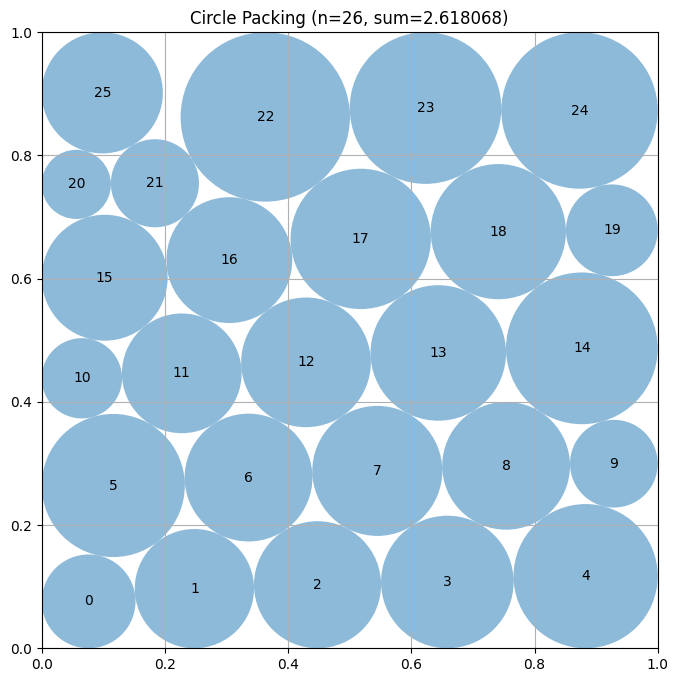

In [1]:
# EVOLVE-BLOCK-START
"""Advanced circle packing with optimized initial configuration, adaptive radii, and hybrid optimization"""
import numpy as np
from scipy.optimize import minimize

def construct_packing():
    """
    Construct a specific arrangement of 26 circles in a unit square
    that attempts to maximize the sum of their radii using a structured
    initial configuration and advanced optimization parameters.
    """
    n = 26
    
    # Generate initial configuration using hexagonal grid
    def generate_initial_configuration(num_circles):
        # Generate hexagonal grid with spacing
        spacing = 0.2
        rows = int(np.ceil(np.sqrt(num_circles)))
        cols = int(np.ceil(num_circles / rows))
        positions = []
        for i in range(rows):
            for j in range(cols):
                x = j * spacing
                y = i * spacing * np.sqrt(3)/2
                if i % 2 == 1:
                    x += spacing / 2
                x = np.clip(x, 0.0, 1.0)
                y = np.clip(y, 0.0, 1.0)
                positions.append([x, y])
        positions = np.array(positions[:num_circles])
        
        # Compute minimum distance between any two circles
        min_dist = np.inf
        for i in range(num_circles):
            for j in range(i+1, num_circles):
                dist = np.linalg.norm(positions[i] - positions[j])
                if dist < min_dist:
                    min_dist = dist
        initial_radius = min_dist / 2
        radii = np.full(num_circles, initial_radius)
        
        return positions, radii

    # Generate initial centers and radii
    initial_centers, initial_radii = generate_initial_configuration(n)

    # Combine centers and radii into a single array for optimization
    initial_params = np.concatenate((initial_centers.flatten(), initial_radii))

    # Define the objective function to maximize the sum of radii
    def objective(params):
        centers = params[:2*n].reshape(n, 2)
        radii = params[2*n:]
        return -np.sum(radii)  # Minimize negative sum of radii to maximize it

    # Define the constraints for the problem
    constraints = []

    # Constraint: All circles must be within the unit square
    for i in range(n):
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: 1 - (params[2*i] + params[2*n + i])})
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: params[2*i] - params[2*n + i]})
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: 1 - (params[2*i + 1] + params[2*n + i])})
        constraints.append({'type': 'ineq', 'fun': lambda params, i=i: params[2*i + 1] - params[2*n + i]})

    # Constraint: No two circles should overlap
    for i in range(n):
        for j in range(i + 1, n):
            constraints.append({
                'type': 'ineq',
                'fun': lambda params, i=i, j=j: np.sqrt((params[2*i] - params[2*j])**2 + (params[2*i + 1] - params[2*j + 1])**2) - (params[2*n + i] + params[2*n + j])
            })

    # Perform the optimization with improved settings
    result = minimize(
        objective, 
        initial_params, 
        constraints=constraints, 
        method='SLSQP', 
        options={'maxiter': 10000, 'ftol': 1e-8, 'eps': 1e-7}
    )

    # Extract the optimized centers and radii
    optimized_centers = result.x[:2*n].reshape(n, 2)
    optimized_radii = result.x[2*n:]
    
    # Ensure radii are non-negative and within bounds
    optimized_radii = np.clip(optimized_radii, 1e-5, 0.5)
    
    # Calculate the sum of radii
    sum_radii = np.sum(optimized_radii)
    
    return optimized_centers, optimized_radii, sum_radii

# EVOLVE-BLOCK-END


# This part remains fixed (not evolved)
def run_packing():
    """Run the circle packing constructor for n=26"""
    centers, radii, sum_radii = construct_packing()
    return centers, radii, sum_radii


def visualize(centers, radii):
    """
    Visualize the circle packing

    Args:
        centers: np.array of shape (n, 2) with (x, y) coordinates
        radii: np.array of shape (n) with radius of each circle
    """
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle

    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw unit square
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.grid(True)

    # Draw circles
    for i, (center, radius) in enumerate(zip(centers, radii)):
        circle = Circle(center, radius, alpha=0.5)
        ax.add_patch(circle)
        ax.text(center[0], center[1], str(i), ha="center", va="center")

    plt.title(f"Circle Packing (n={len(centers)}, sum={sum_radii:.6f})")
    plt.show()


if __name__ == "__main__":
    centers, radii, sum_radii = run_packing()
    print(f"Sum of radii: {sum_radii}")
    # AlphaEvolve improved this to 2.635

    # Uncomment to visualize:
    visualize(centers, radii)